<a href="https://colab.research.google.com/github/kavyasridandu02/Prodigy_ML02/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall** **Customer** **Segmentation using** **K**-**Means** **Cluster**

**Importing** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/customers/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
mask=df['Spending Score (1-100)']>50
df_score=df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [ ]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


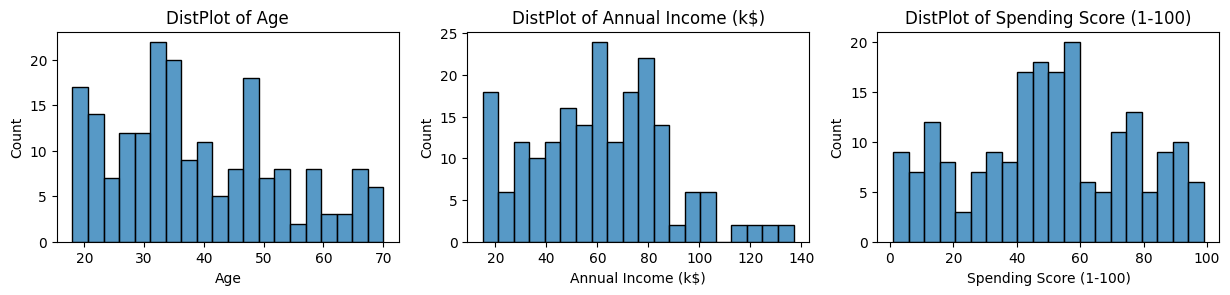

In [ ]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n += 1
  plt.subplot(2,3,n)
  plt.subplots_adjust(hspace=0.2,wspace = 0.2)
  sns.histplot(df[x],bins = 20)
  plt.title('DistPlot of {}'.format(x))
plt.show();

**These** **features** **are** **normally** **distributed** **with** **a** **little** **bit** **of** **skewness** **in** **the** **first** **two** **types**

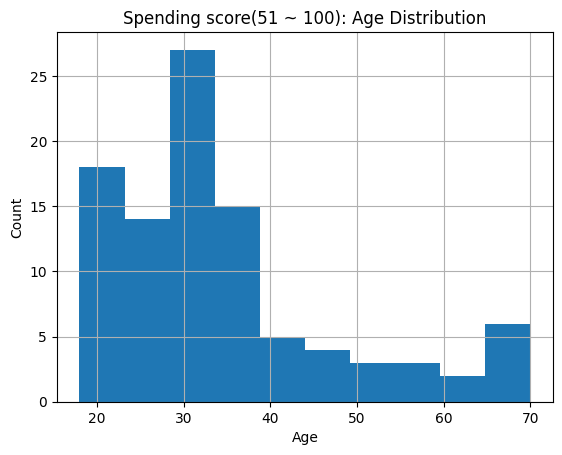

In [ ]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending score(51 ~ 100): Age Distribution');

**Count** **Plot** **Of** **Gender**

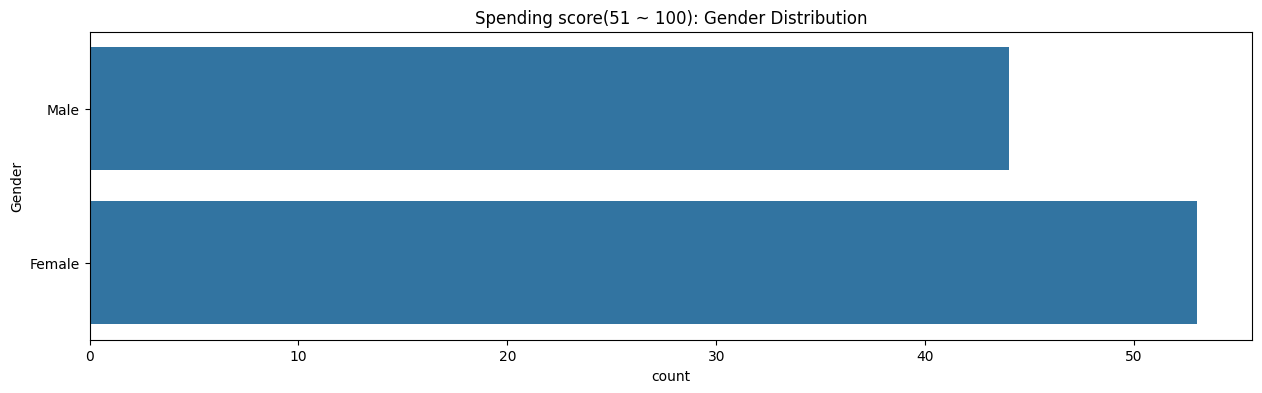

In [ ]:
plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data = df_score)
plt.title('Spending score(51 ~ 100): Gender Distribution')
plt.show();

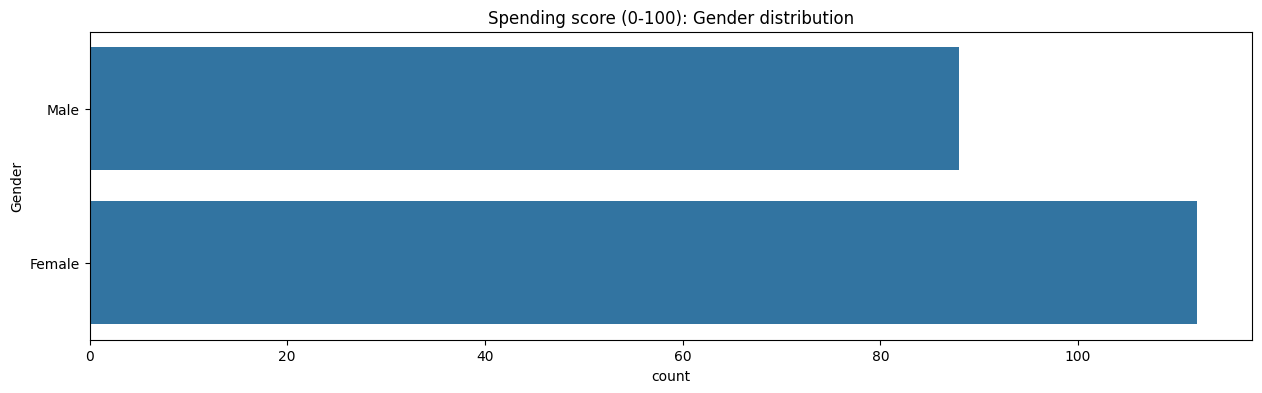

In [ ]:
plt.figure(figsize = (15,4))
sns.countplot(y= 'Gender',data = df)
plt.title('Spending score (0-100): Gender distribution')
plt.show();

In [ ]:
[[]]

[[]]

In [ ]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


**Plotting** **the** **Relation** **between** **Age**,**Annual Income and Spending Score**

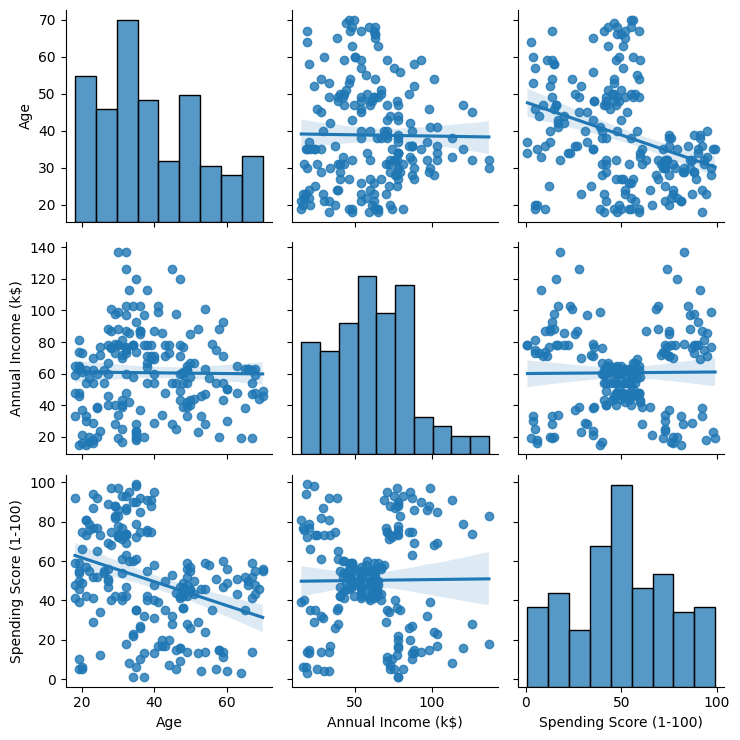

In [ ]:
import warnings
warnings.filterwarnings("ignore",category =UserWarning)
import seaborn as sns
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']],kind='reg')
plt.tight_layout()
plt.show();

**Distribution of values in Age,Annual Income and Spending Score according to Gender**

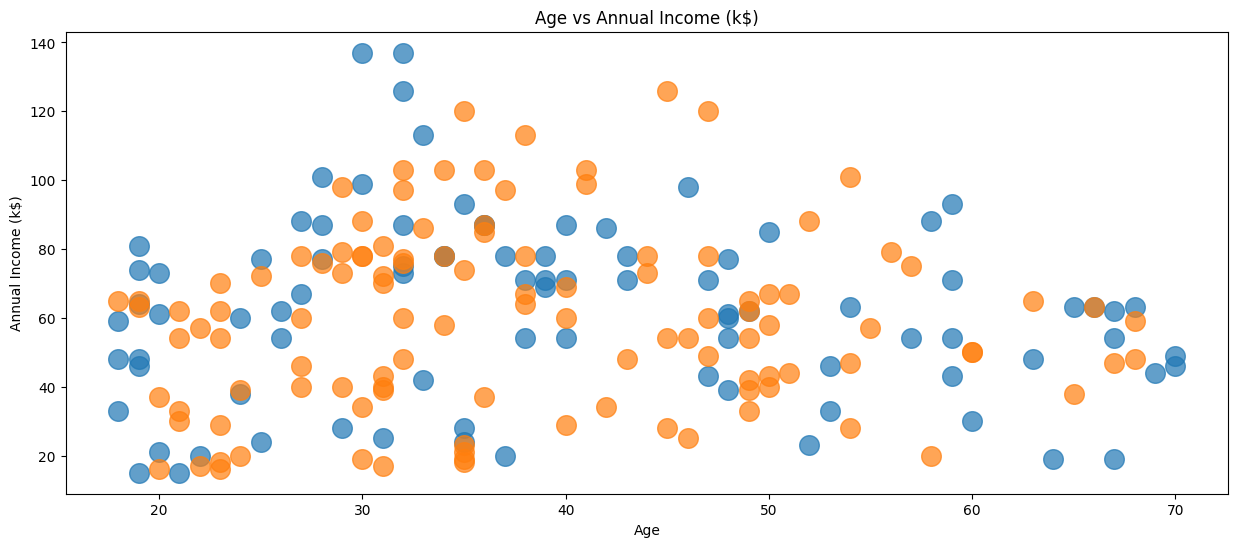

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
  plt.scatter(x = 'Age',y = 'Annual Income (k$)',data = df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
  plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
  plt.title('Age vs Annual Income (k$)')
  plt.legend

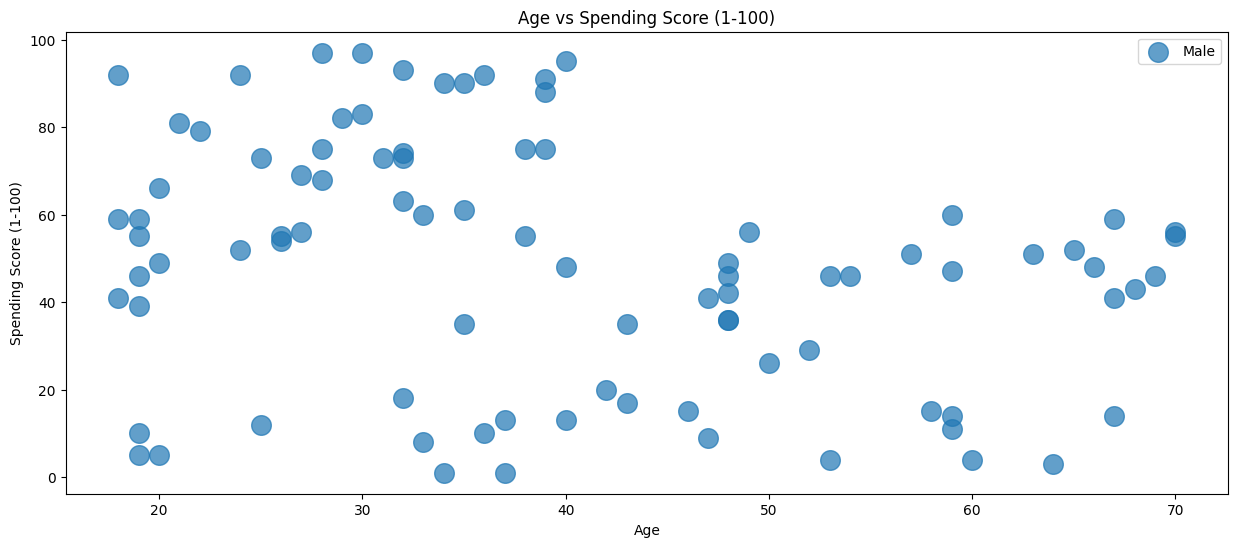

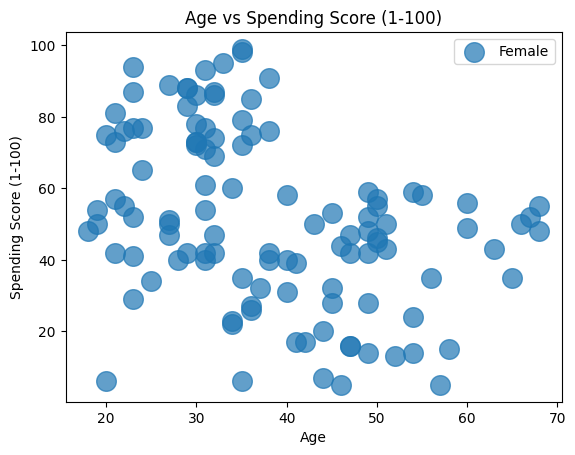

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
  plt.scatter(x = 'Age',y = 'Spending Score (1-100)',data = df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
  plt.xlabel('Age'),plt.ylabel('Spending Score (1-100)')
  plt.title('Age vs Spending Score (1-100)')
  plt.legend()
  plt.show()

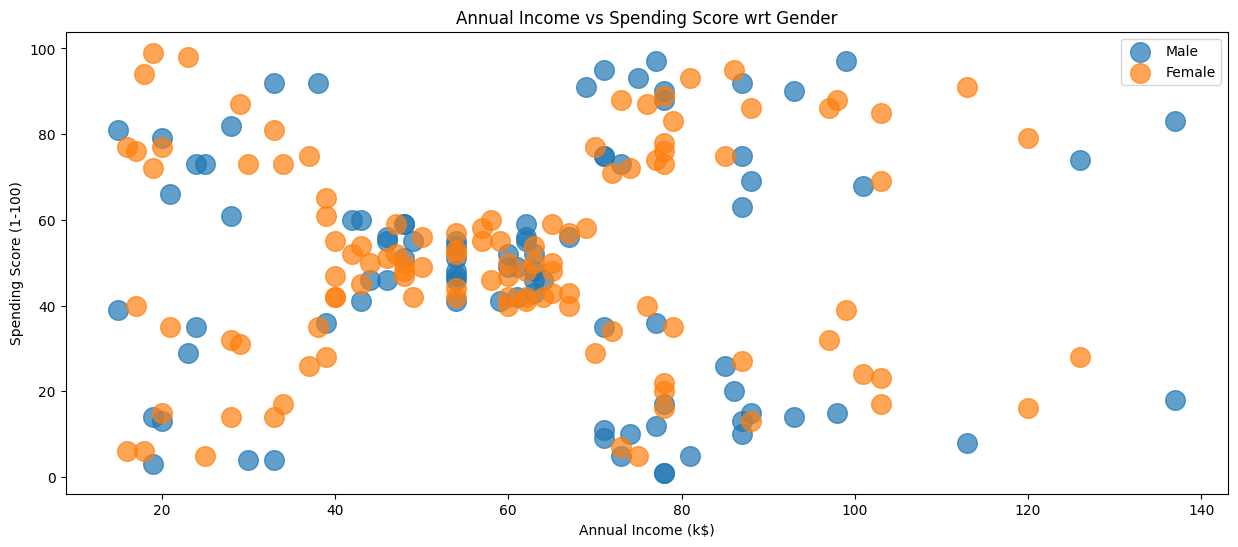

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
   plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score wrt Gender')
plt.legend()
plt.show()

<ipython-input-23-b096571d821a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y='Gender',data = df,palette = 'vlag')


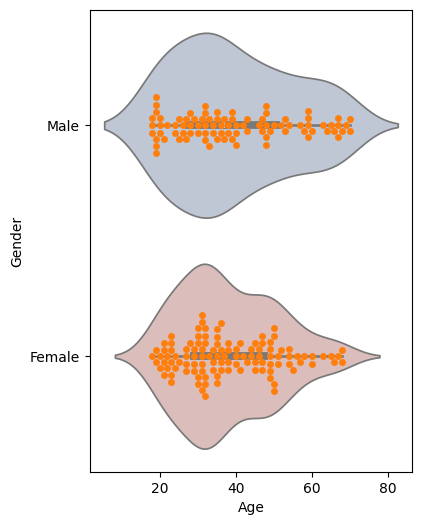

<ipython-input-23-b096571d821a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y='Gender',data = df,palette = 'vlag')


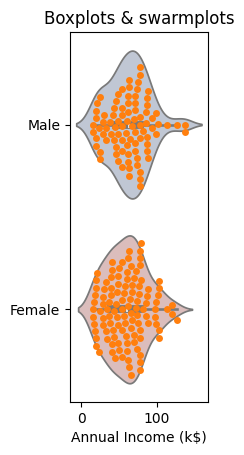

<ipython-input-23-b096571d821a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y='Gender',data = df,palette = 'vlag')


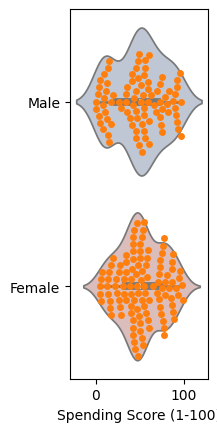

In [ ]:
plt.figure(1,figsize = (15,6))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
  sns.violinplot(x = cols,y='Gender',data = df,palette = 'vlag')
  sns.swarmplot(x = cols,y = 'Gender',data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Boxplots & swarmplots' if n == 2 else '')
  plt.show()

**Split**

In [ ]:
x = df.iloc[:,[3,4]]
print(f"x shape: {x.shape}")
x.head()

x shape: (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Clustering** **using** **K**-**Means**

In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
for k in n_clusters:
  model = KMeans(n_clusters = k,random_state=42,n_init=10)
  model.fit(x)
  inertia_errors.append(model.inertia_)
  silhouette_scores.append(silhouette_score(x,model.labels_))
print("Inertia:",inertia_errors[:3])
print("Silhouette Score:",silhouette_scores[:3])
print()


Inertia: [181363.59595959607, 106348.37306211119, 73679.78903948837]
Silhouette Score: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]



<function matplotlib.pyplot.show(close=None, block=None)>

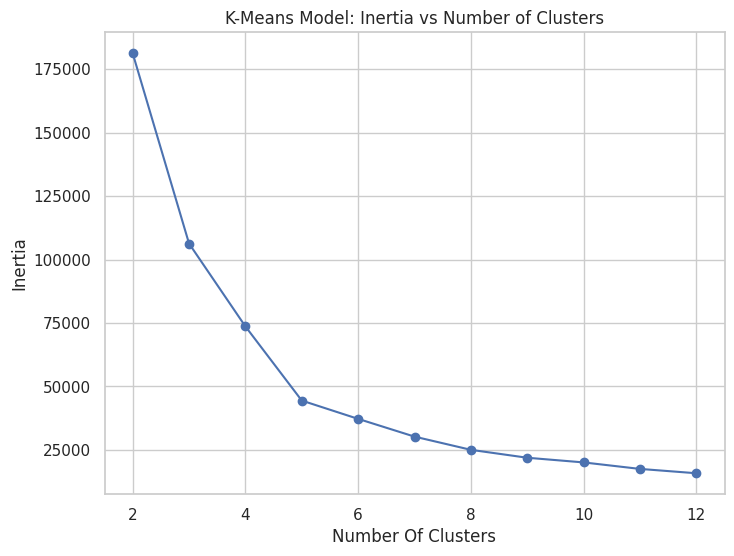

In [ ]:
x_values = list(range(2, 13))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values, inertia_errors, marker='o',linestyle='-', color='b')
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show

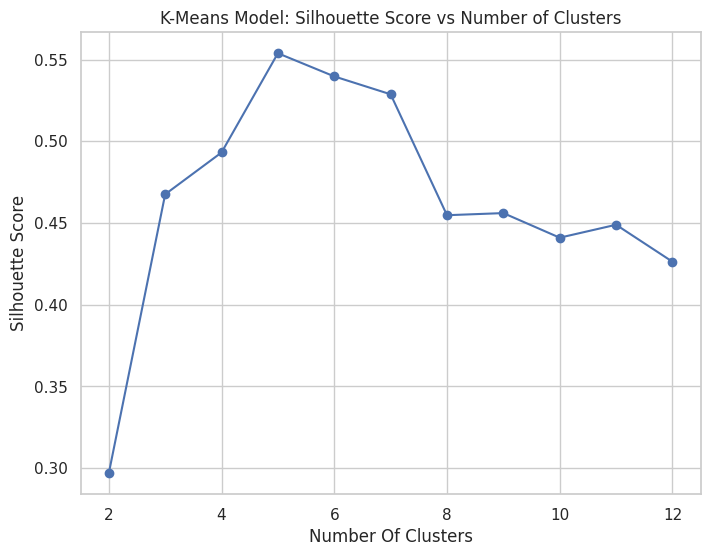

In [ ]:
x_values = list(range(2, 13))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values, silhouette_scores, marker='o',linestyle='-', color='b')
plt.title('K-Means Model: Silhouette Score vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**The best number of clusters is 5**

In [ ]:
final_model = KMeans(n_clusters = 5,random_state=42,n_init=10)
final_model.fit(x)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


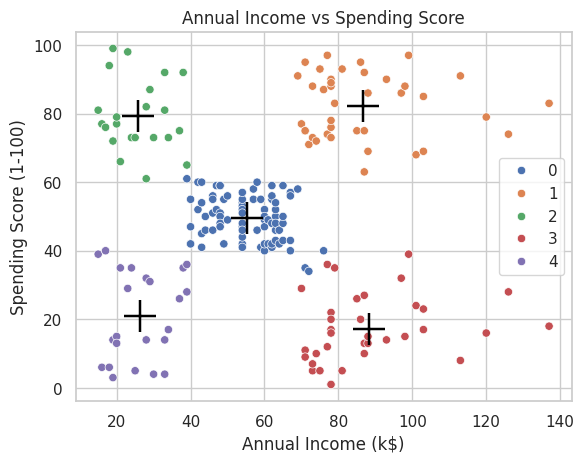

In [ ]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=labels,palette='deep')
sns.scatterplot(
    x = centroids[:, 0],
    y = centroids[:, 1],
    color = 'black',
    marker = '+',
    s = 500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score");


In [ ]:
xgb = x.groupby(final_model.labels_).mean()


In [ ]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


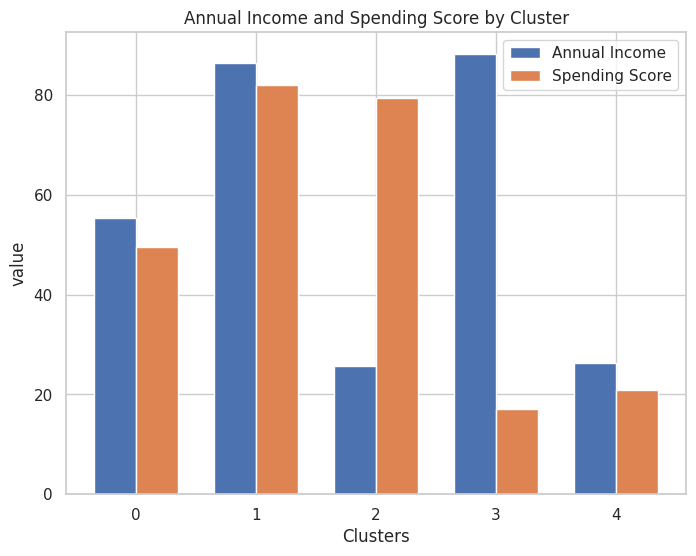

In [ ]:
plt.figure(figsize=(8, 6))
x = [0,1,2,3,4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
score_values = xgb['Spending Score (1-100)']
bar_width = 0.35
index = range(len(x))
plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], score_values, bar_width, label='Spending Score')
plt.xlabel('Clusters')
plt.ylabel('value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x) # removed extra space before bar_width
plt.legend()
plt.show()